# Some housekeeping first

Just run the cell below to set us up for the rest of this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def F(t,Y) :
    dydt = Y[1]
    dvdt = -0.3*Y[1]+Y[0]-Y[0]**3+gamma*np.cos(1.2*t)
    return (dydt,dvdt)

# A better way to spot periodicity

In the previous exercise we observed that the solution $y(t)$ for the i.v.p.

$$y''+0.3y'-y+y^3=\gamma\cos(1.2t),\quad y(0)=1,\quad y'(0)=0.$$ 

looks like it eventually gets periodic for $\gamma=0.2, 0,28, 0.37, 0.65$, but for $\gamma=0.5$ it is less clear what happens.
 
The cell below generates the graph for the case $\gamma=0.5$. Take a look at it!

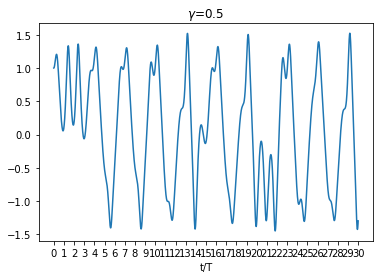

In [2]:
%matplotlib inline

T = 2*np.pi/1.2
t = np.linspace(0,30*T,5000)

gamma = 0.5
ysol = solve_ivp(F,[0,30*T],[1,0],t_eval=t,max_step=0.1)

plt.xticks(np.arange(0,31*T,T),np.arange(0,31,1))
plt.xlabel('t/T')
plt.plot(ysol.t,ysol.y[0])
plt.title(r'$\gamma$=0.5')
plt.show()

Of course this picture can't tell us for sure whether or not the solution $y(t)$ is periodic. It is possible that

- It's not periodic
- It's periodic, but the period length is too long for us to see it the plot.
- It's eventually periodic, but only for $t$ larger than what's visible in the plot.

We could of course plot the graph above but with a much longer interval for $t$, like this (opens in a separate window, maximize it and take a look):

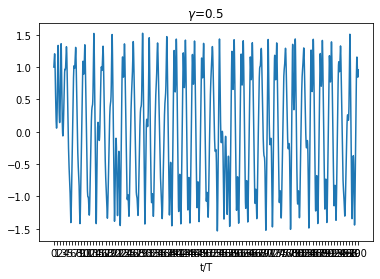

In [4]:
t = np.linspace(0,100*T,5000)
ysol = solve_ivp(F,[0,100*T],[1,0],t_eval=t,max_step=0.1)

plt.xticks(np.arange(0,101*T,T),np.arange(0,101,1))
plt.xlabel('t/T')
plt.plot(ysol.t,ysol.y[0])
plt.title(r'$\gamma$=0.5')
plt.show()

But this doesn't help that much. Even if there is periodicity in this interval, the picture is so complicated that it would still be difficult to spot. 


## Plotting a phase portrait
Instead, let us turn to a different way of visualising the motion of the oscillator. Let's plot it in "state space", which simply means putting the displacement $y(t)$ on the horizontal axis and the momentum $y'(t)$  (since we have unit mass) on the vertical axis. Let's look at a simple example first:
 
As we can easily verify, the solution to the i.v.p.

$$y''+4y=3\cos{t},\quad y(0)=1, y'(0)=2,$$

is

$$y(t)=\sin{2t}+\cos{t}.$$

Of course, this solution is periodic with period $2\pi$. Let's plot it in state space, for which we need the derivative:

$$y'(t)=2\cos{2t}-\sin{t}.$$

For example, we can take note of the following points $(y,y')$ in state space:

 
| $t$ | $y(t)$   | $y'(t)$  |
| -------------: |-------------:| -----:|
| $0+2\pi n$      | $1$ | $2$ |
| $\pi/2+2\pi n$  | $0$ | $-3$ |
| $\pi+2\pi n$ | $-1$ | $2$ |
| $3\pi/2+2\pi n$ | $0$ | $-1$ |

The cell below plots these (red points) together with the $t$-values in between (blue). Take a look at the plot we get!

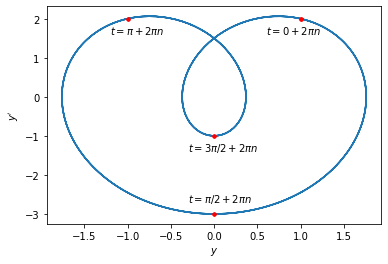

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

t=np.linspace(0,3*2*np.pi,1000)
tpoints = np.arange(0,3*2*np.pi+0.1,np.pi/2)

y = np.sin(2*t)+np.cos(t)
yp = 2*np.cos(t*2)-np.sin(t)

ypoints = np.sin(2*tpoints)+np.cos(tpoints)
yppoints = 2*np.cos(tpoints*2)-np.sin(tpoints)

plt.plot(y,yp)
plt.plot(ypoints,yppoints,'r.')
plt.annotate(r'$t=0+2\pi n$', xy=(ypoints[0]-0.4,yppoints[0]-0.4))
plt.annotate(r'$t=\pi/2+2\pi n$', xy=(ypoints[1]-0.3,yppoints[1]+0.3))
plt.annotate(r'$t=\pi+2\pi n$', xy=(ypoints[2]-0.2,yppoints[2]-0.4))
plt.annotate(r'$t=3\pi/2+2\pi n$', xy=(ypoints[3]-0.3,yppoints[3]-0.4))
plt.xlabel(r'$y$')
plt.ylabel(r"$y'$")

plt.show()

As $t$ increases, the curve above (a parametric curve if you're familiar with that concept) is traversed in the clockwise direction. The fact that the motion is periodic is reflected by the fact that the curve above overlaps itself. Plotting it for $t\in [0,2\pi]$ gives us exactly the same picture as if we had plotted it for $t\in [0,10000\pi]$.
 
A plot like this is called a "phase plot" or "phase portrait" of the system. Now let's do the same for our funny oscillator!

## Exercise

For each of the following values of $\gamma$, construct a phase plot for our initial value problem:
 
$$\gamma = 0.2,\quad \gamma=0.28,\quad \gamma=0.37,\quad \gamma=0.5,\quad \gamma=0.65.$$
 
Let $T=2\pi/1.2$, i.e the period length of the external force.
 
We will calculate the solution for $t\in [0,200T]$  (our initial conditions are for $t=0$ so we have to start there), but we'll set `t_eval` (the points for which we want `solve_ivp` to return its calculated values) to only contain points in $[100T,200T]$. This is to allow initial irregular behaviour of the oscillator to die out before we start plotting.
 
Creating the phase plots will be straightforward, since `solve_ivp` returns both an array of values for $y(t)$ and an array of values for $v(t)$ (recall that $v=y'$).

We'll arrange the phase plots in two rows. The cell below provides a template. You just have to fill in the missing details (five plot commands are missing). Fill in the missing details and then run the cell.

## To submit in LAMS
Submit the generated plot in LAMS. Note that since there are many calculations involved, it will take a few seconds for Python to generate the plot.

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 62912
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 523.5987756 ,  523.7035163 ,  523.808257  , ..., 1046.98806979,
       1047.09281049, 1047.1975512 ])
 t_events: None
        y: array([[  5.7929863 ,   6.12221068,   5.22216698, ...,   3.28901454,
          4.52573204,   5.79253255],
       [  9.06272317,  -3.36269594, -12.25504225, ...,   9.28954178,
         13.37444456,   9.06314337]])
 y_events: None


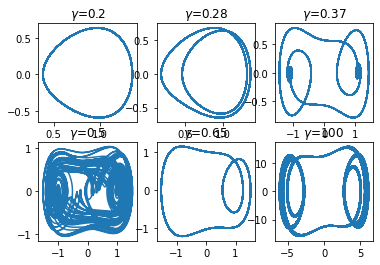

In [13]:
# Below we create a suitable array t for us to use at t_eval below.
# We want to plot the calculated solution values for 5000 equally 
# spaced values between 100T and 200T
# where T is the period length of the external force.

T = 2*np.pi/1.2

t = np.linspace(100*T,200*T,5000)

# Calculate numerical solutions for each value of gamma

gamma = 0.2
ysol_a = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)

gamma = 0.28
ysol_b = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)

gamma = 0.37
ysol_c = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)

gamma = 0.5
ysol_d = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)

gamma = 0.65
ysol_e = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)

gamma = 100
ysol_f = solve_ivp(F,[0,200*T],[1,0],t_eval=t,max_step=0.1)
print(ysol_f)

# Plot the phase portraits

plt.clf()
plt.subplot(231)
# Issue a suitable plot command such that we get the y-values from ysol_a on the horizontal axis
# and the y'-values, also from ysol_a on the vertical axis.
plt.plot(ysol_a.y[0],ysol_a.y[1])
plt.title(r'$\gamma$=0.2')


plt.subplot(232)
# Issue a suitable plot command such that we get the y-values from ysol_b on the horizontal axis
# and the y'-values, also from ysol_b on the vertical axis.
plt.plot(ysol_b.y[0],ysol_b.y[1])
plt.title(r'$\gamma$=0.28')


plt.subplot(233)
# Issue a suitable plot command such that we get the y-values from ysol_c on the horizontal axis
# and the y'-values, also from ysol_c on the vertical axis.
plt.plot(ysol_c.y[0],ysol_c.y[1])
plt.title(r'$\gamma$=0.37')


plt.subplot(234)
# Issue a suitable plot command such that we get the y-values from ysol_d on the horizontal axis
# and the y'-values, also from ysol_d on the vertical axis.
plt.plot(ysol_d.y[0],ysol_d.y[1])
plt.title(r'$\gamma$=0.5')


plt.subplot(235)
# Issue a suitable plot command such that we get the y-values from ysol_e on the horizontal axis
# and the y'-values, also from ysol_e on the vertical axis.
plt.plot(ysol_e.y[0],ysol_e.y[1])
plt.title(r'$\gamma$=0.65')

plt.subplot(236)
plt.plot(ysol_f.y[0],ysol_f.y[1])
plt.title(r'$\gamma$=100')

plt.show()